In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [83]:

# Load the dataset
dataload = pd.read_csv('D:/Mohanapriya/CreditCadData/Credit Card_Clustering/Credit Card_Clustering.csv')


In [84]:
dataload.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [85]:
round(dataload.isnull().sum(axis=0)*100/dataload.shape[0],2)


CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [86]:
dataload.describe()


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [87]:
dataload.head(8)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12

In [88]:
dataload.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [89]:
dataload.duplicated().sum()

0

In [90]:
dataload.describe().T


count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [91]:
important_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 


In [92]:
important_columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [93]:
final_data = dataload[important_columns].dropna()

In [94]:
final_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      201.802084        139.509787          0.000000  
1     4103.032597       1072.340217          0.222222  
2      622.066742        627.284787          0.000000  
4      678.334763        244.791237          0.000000  
5     1400.057770       2407.246035          0.000000  
...           ...               ...               ...  
8943    58.644883         43.473717          0.000000  
8945   325.594462         48.886365          0.500000  
8947    81.270775         82.418369          0.250000  
8948    52.549959         

In [95]:
corr_matrix = final_data.corr()


In [96]:
corr_matrix

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.310140   0.176083   
BALANCE_FREQUENCY                 0.310140           1.000000   0.122635   
PURCHASES                         0.176083           0.122635   1.000000   
ONEOFF_PURCHASES                  0.159985           0.095254   0.916780   
INSTALLMENTS_PURCHASES            0.122109           0.114739   0.679259   
CASH_ADVANCE                      0.495586           0.089036  -0.053760   
PURCHASES_FREQUENCY              -0.088459           0.228158   0.393000   
ONEOFF_PURCHASES_FREQUENCY        0.063832           0.187467   0.497384   
PURCHASES_INSTALLMENTS_FREQUENCY -0.069582           0.184159   0.316025   
CASH_ADVANCE_FREQUENCY            0.445307           0.181132  -0.124863   
CASH_ADVANCE_TRX                  0.382388           0.133265  -0.070277   
PURCHASES_TRX                     0.147887           0.183095   0.688732   
CREDIT_LIMIT                      0.535518           0.087682   0.358425   
PAYMENTS                          0.322830           0.039169   0.606782   
MINIMUM_PAYMENTS                  0.398669           0.132519   0.093842   
PRC_FULL_PAYMENT                 -0.333594          -0.156961   0.176447   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.159985                0.122109   
BALANCE_FREQUENCY                         0.095254                0.114739   
PURCHASES                                 0.916780                0.679259   
ONEOFF_PURCHASES                          1.000000                0.329650   
INSTALLMENTS_PURCHASES                    0.329650                1.000000   
CASH_ADVANCE                             -0.033244               -0.066099   
PURCHASES_FREQUENCY                       0.265460                0.441193   
ONEOFF_PURCHASES_FREQUENCY                0.524514                0.211829   
PURCHASES_INSTALLMENTS_FREQUENCY          0.128380                0.511130   
CASH_ADVANCE_FREQUENCY                   -0.086413               -0.136455   
CASH_ADVANCE_TRX                         -0.048705               -0.076716   
PURCHASES_TRX                             0.545313                0.626083   
CREDIT_LIMIT                              0.320613                0.258057   
PAYMENTS                                  0.570850                0.385391   
MINIMUM_PAYMENTS                          0.048741                0.132156   
PRC_FULL_PAYMENT                          0.129890                0.178440   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.495586            -0.088459   
BALANCE_FREQUENCY                     0.089036             0.228158   
PURCHASES                            -0.053760             0.393000   
ONEOFF_PURCHASES                     -0.033244             0.265460   
INSTALLMENTS_PURCHASES               -0.066099             0.441193   
CASH_ADVANCE                          1.000000            -0.218566   
PURCHASES_FREQUENCY                  -0.218566             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.090111             0.502123   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.178873             0.862338   
CASH_ADVANCE_FREQUENCY                0.629030            -0.316771   
CASH_ADVANCE_TRX                      0.656911            -0.208749   
PURCHASES_TRX                        -0.078449             0.567168   
CREDIT_LIMIT                          0.304161             0.121372   
PAYMENTS                              0.459342             0.100715   
MINIMUM_PAYMENTS                      0.140094             0.002979   
PRC_FULL_PAYMENT                     -0.158566             0.305393   

                                  ONEOFF_PURCHASES_FREQUENCY  \
BALANCE                                             0.063832   
BALANCE_FREQUENCY                                   0.187467   
PURCHASES      

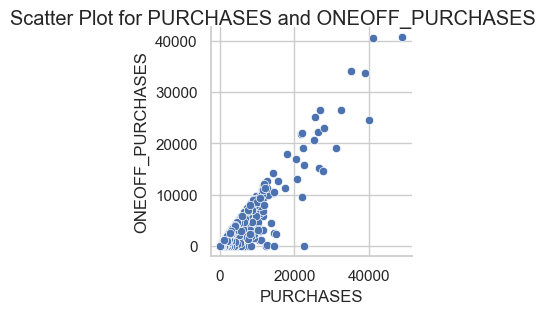

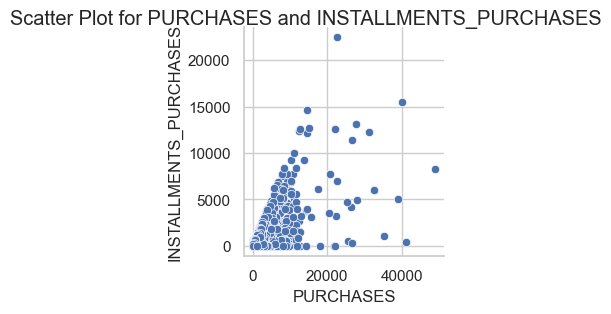

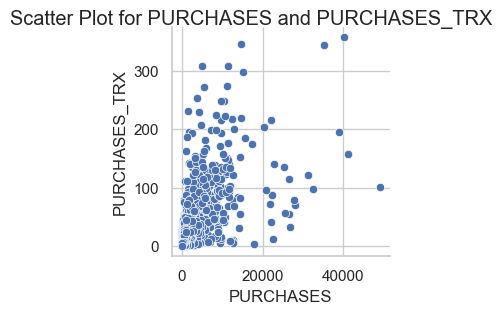

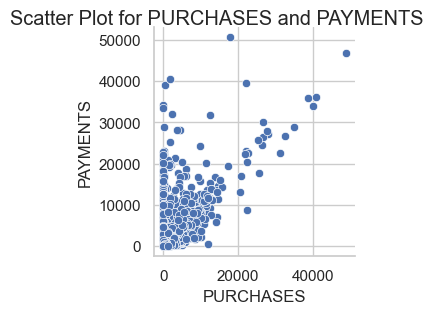

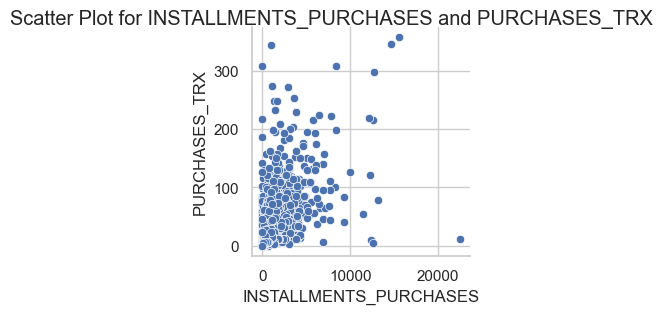

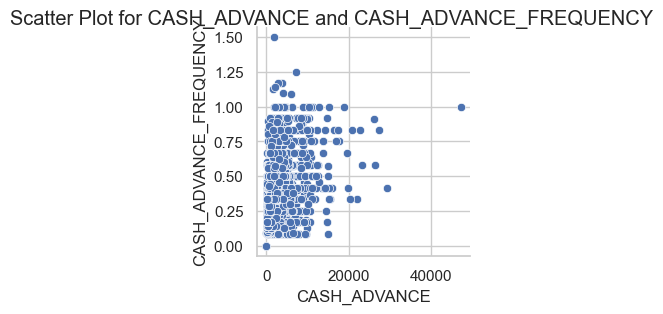

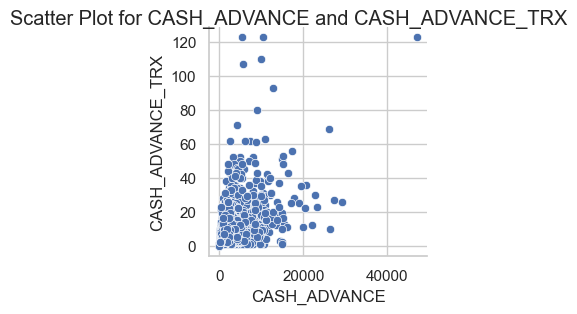

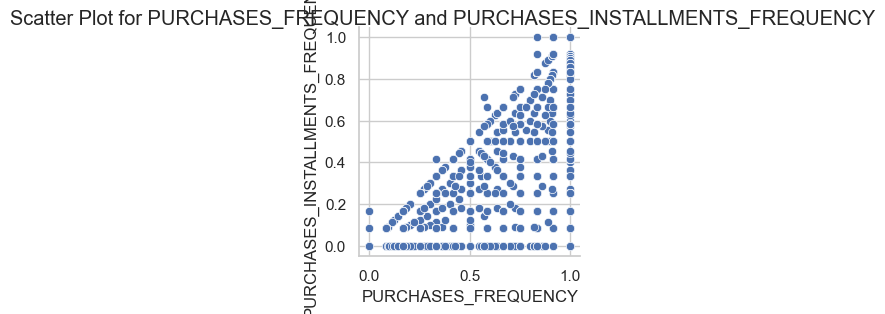

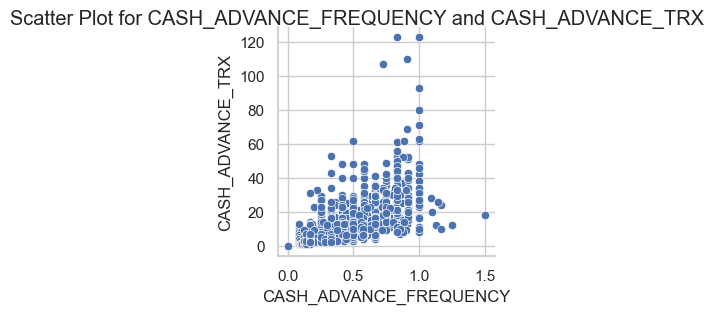

In [99]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set() 
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(final_data, height=3, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()


### Now we Want to See the diffrent distribuation for all columns

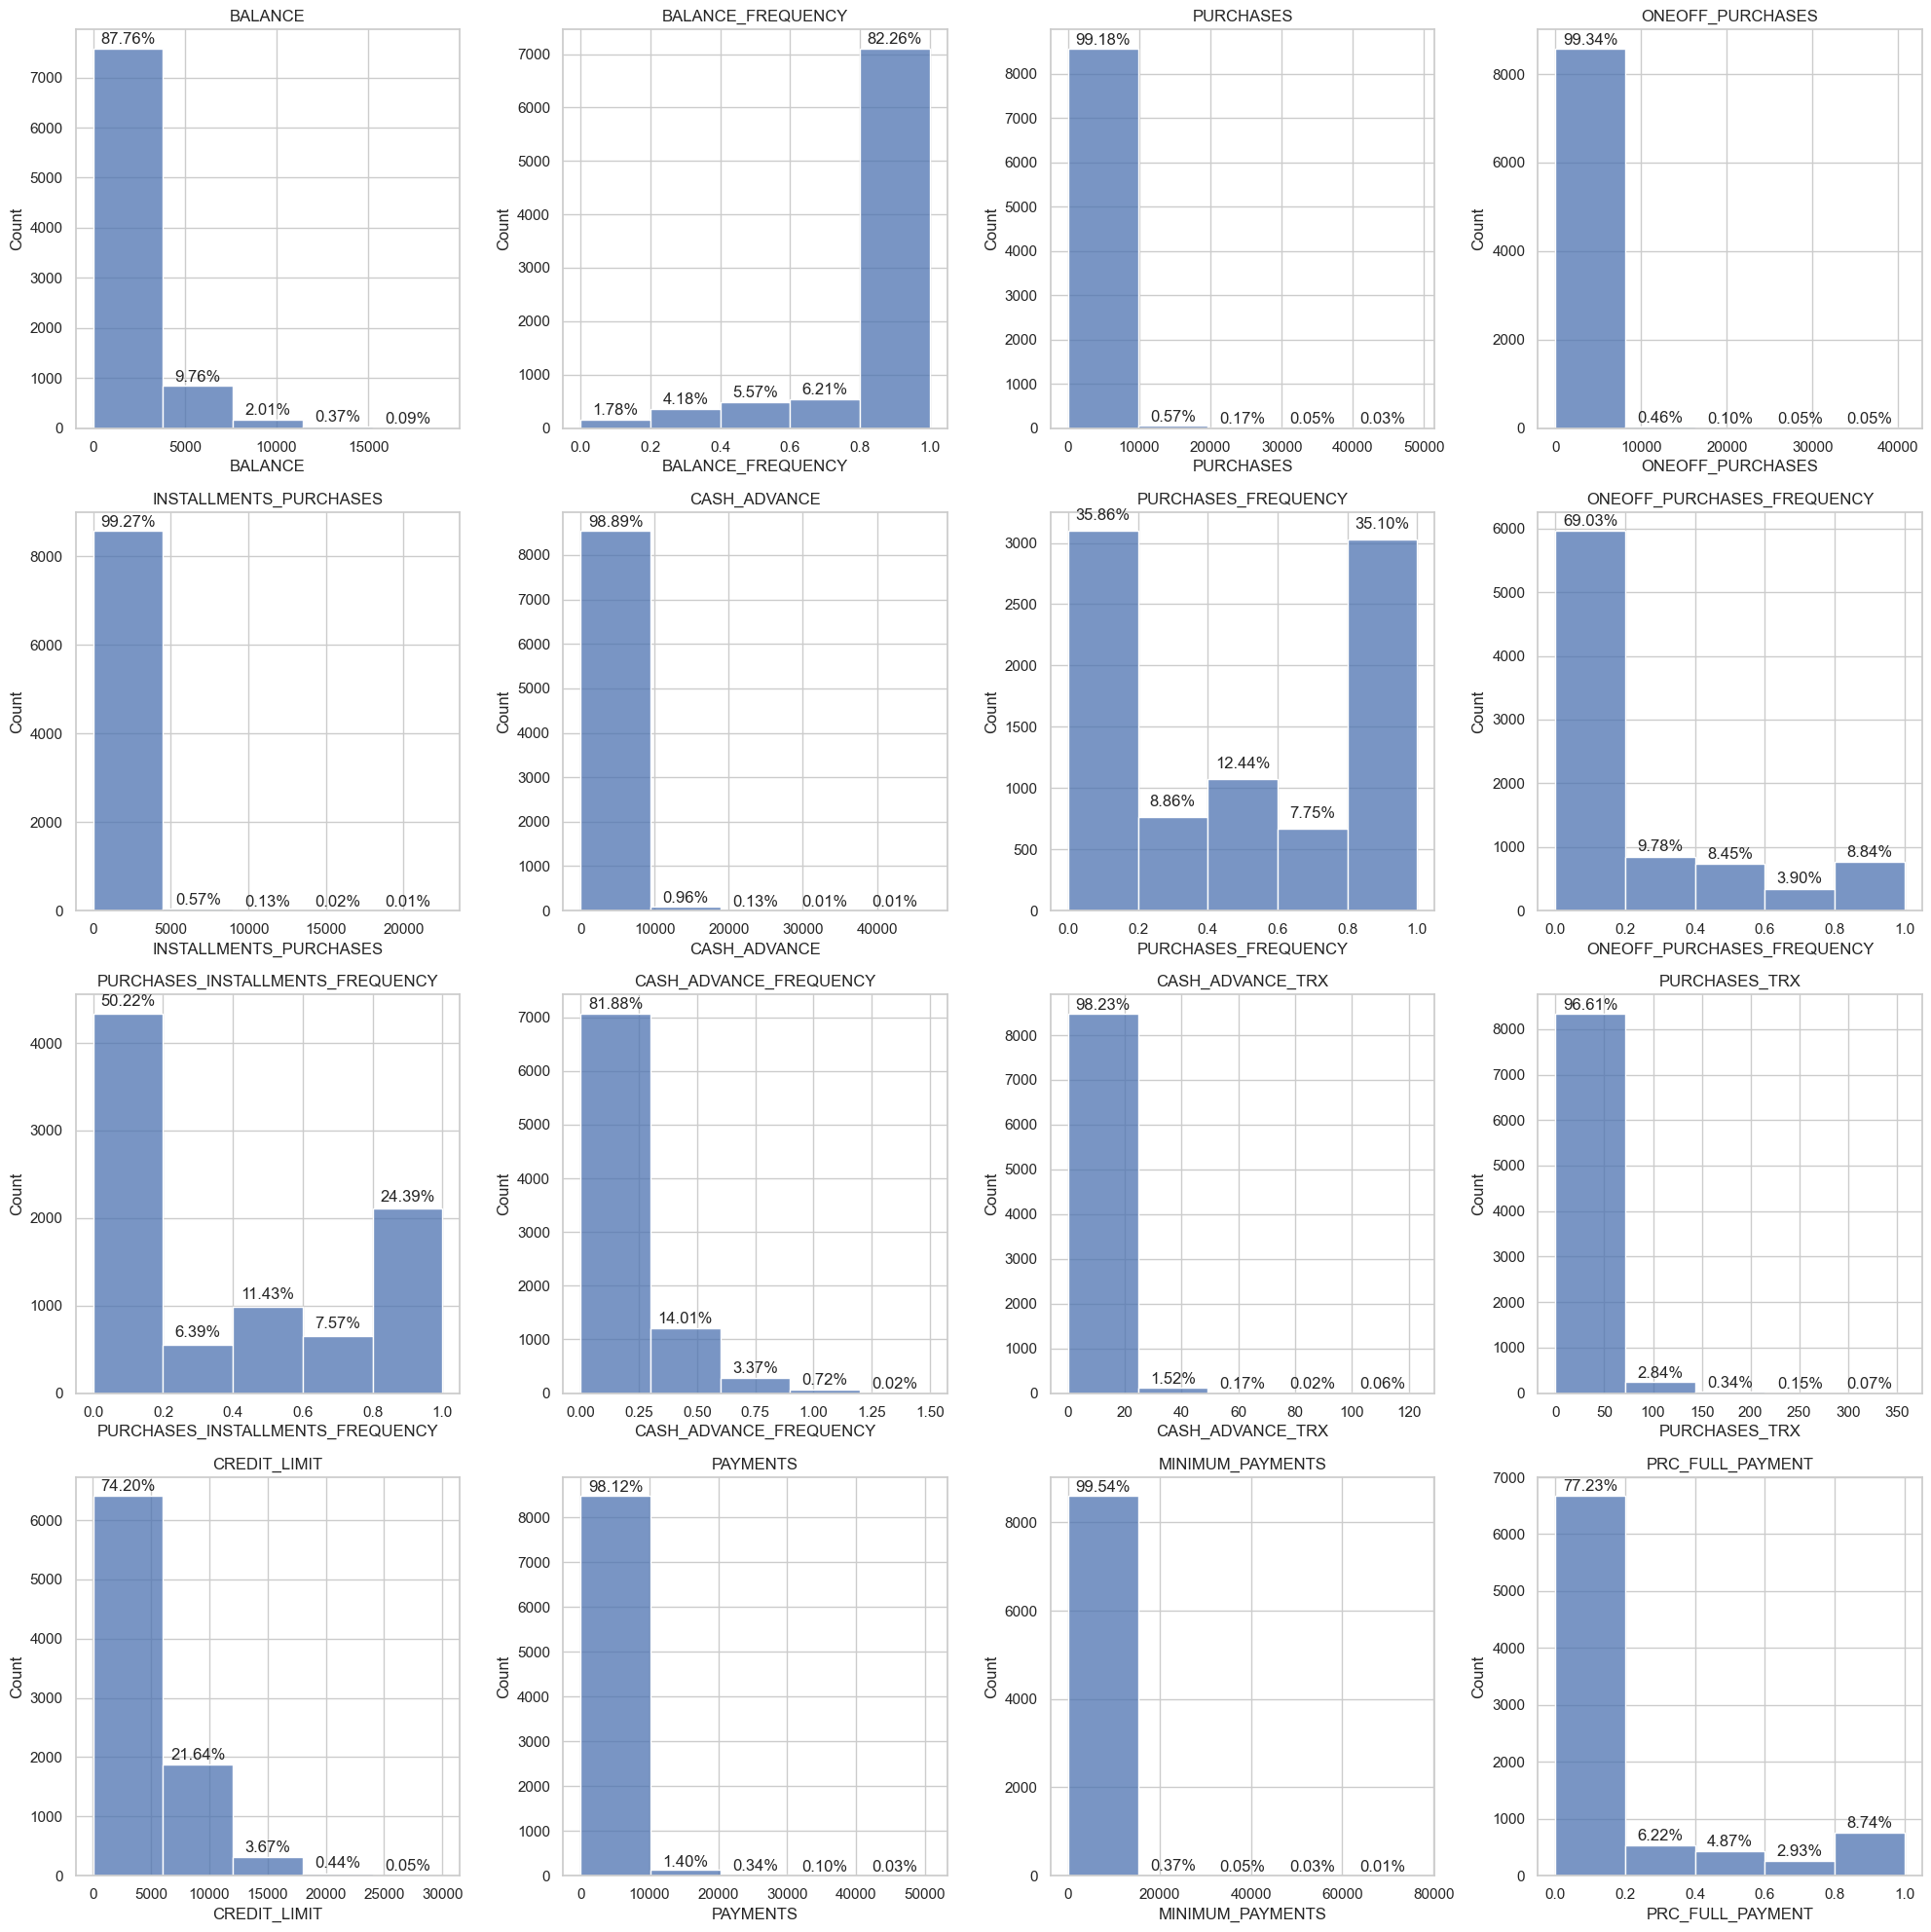

In [100]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    
    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()

### See the Distribuation (Skewnees )

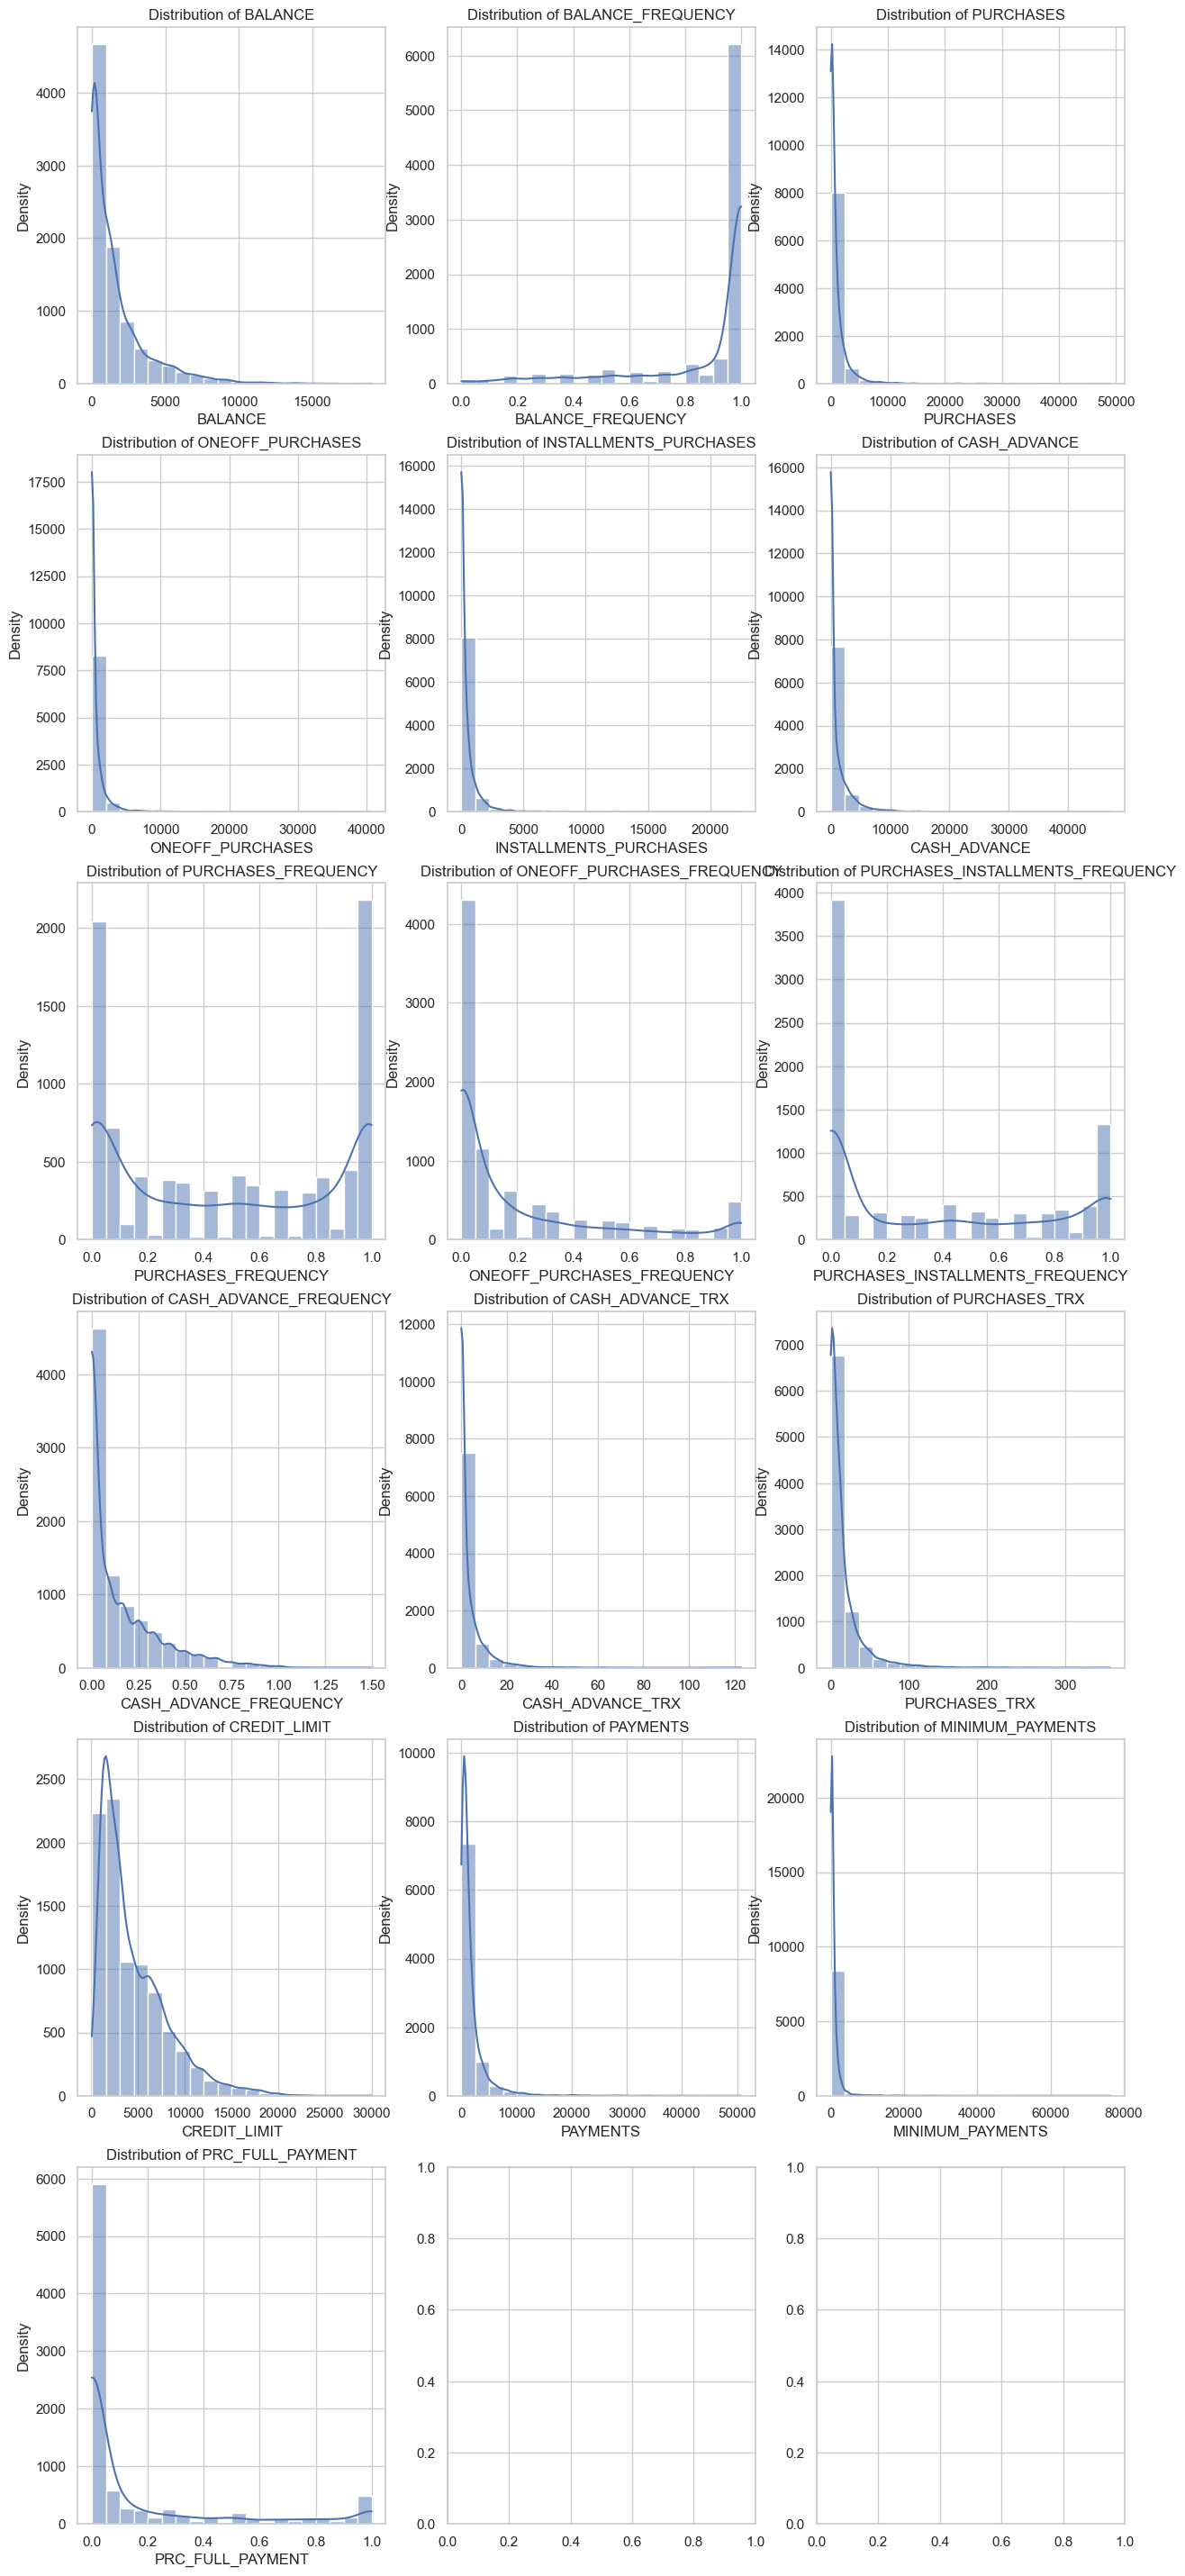

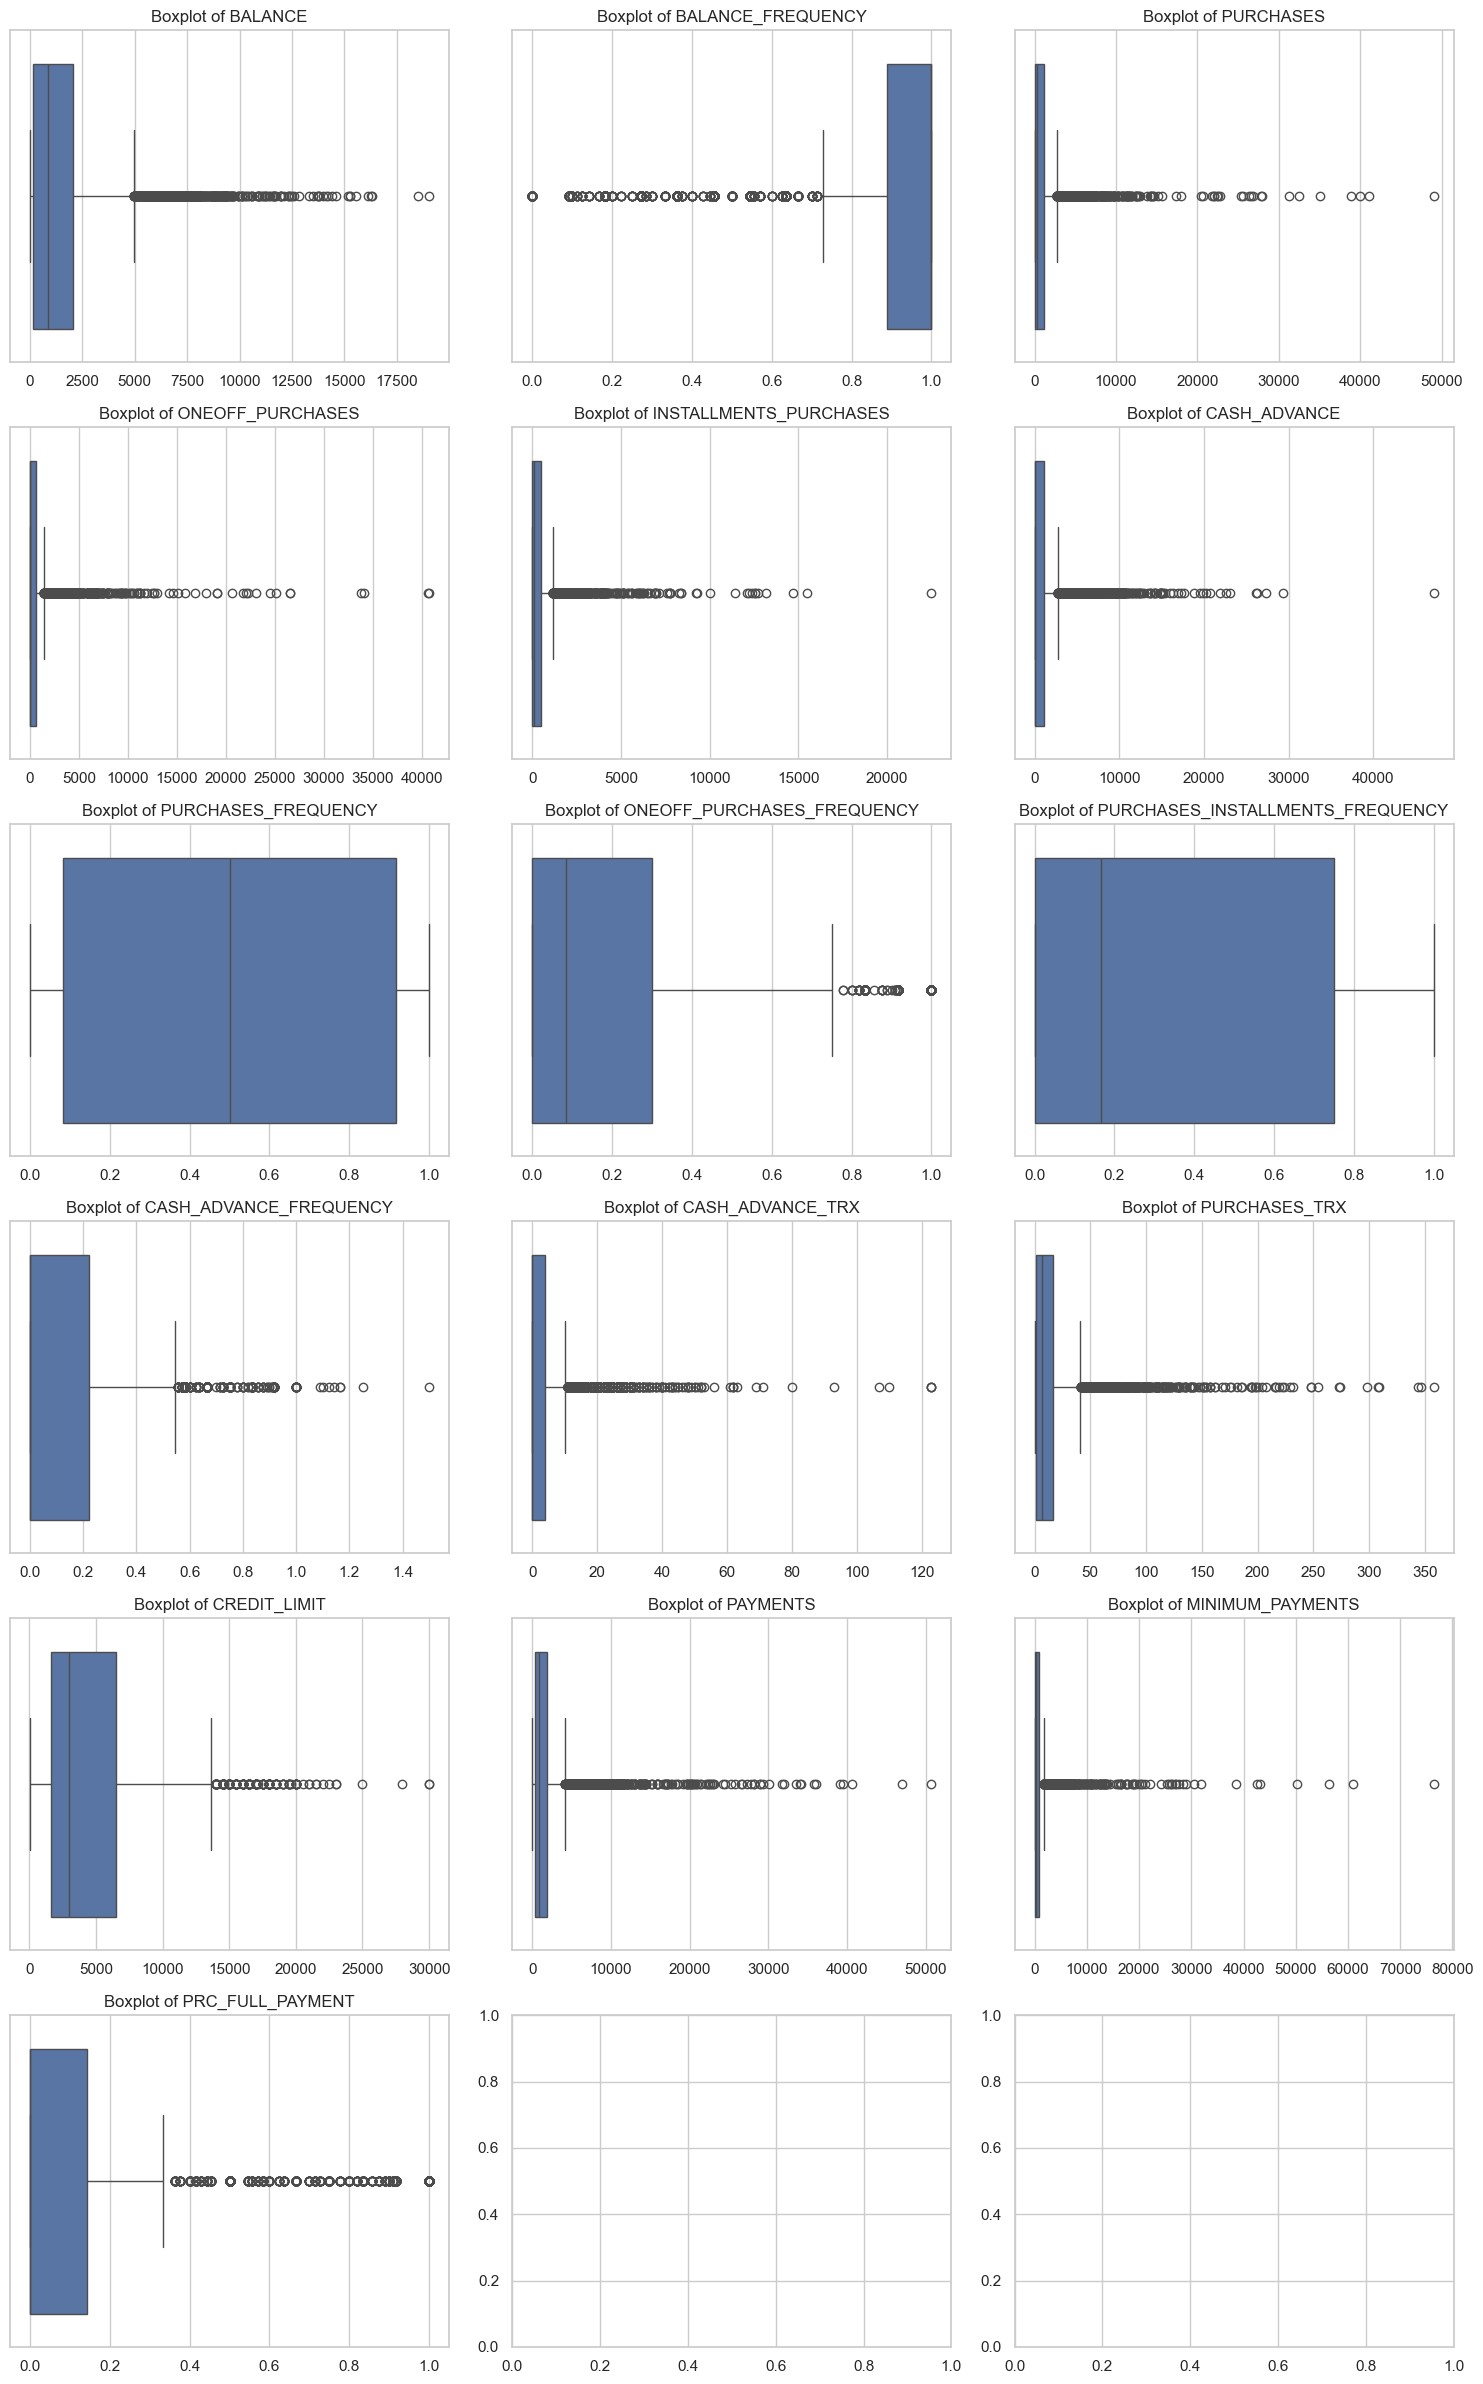

In [110]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Number of rows and columns for the subplot grid
num_columns = len(important_columns)
num_rows = (num_columns + 2) // 3

# Subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(important_columns):
    sns.histplot(dataload[col].dropna(), bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set(xlabel=col, ylabel='Density')

# Create subplots for boxplots
fig_box, axes_box = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes for easy iteration
axes_box = axes_box.flatten()

# Plot boxplots
for i, col in enumerate(important_columns):
    sns.boxplot(x=dataload[col], ax=axes_box[i], linewidth=1.0)
    axes_box[i].set_title(f'Boxplot of {col}')
    axes_box[i].set(xlabel='')

# Adjust layout
plt.tight_layout()
plt.show()


In [111]:
#make a copy for the original dataset
df_copy=dataload.copy()

In [112]:
df_copy

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [113]:
df_copy.dropna(inplace=True)


In [114]:
df_copy.isna().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [115]:
import numpy as np


In [116]:
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [117]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df_copy[skewness_features] = np.log(df_copy[skewness_features] + 0.1)

In [118]:
from matplotlib import gridspec
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


<Figure size 2000x300 with 0 Axes>

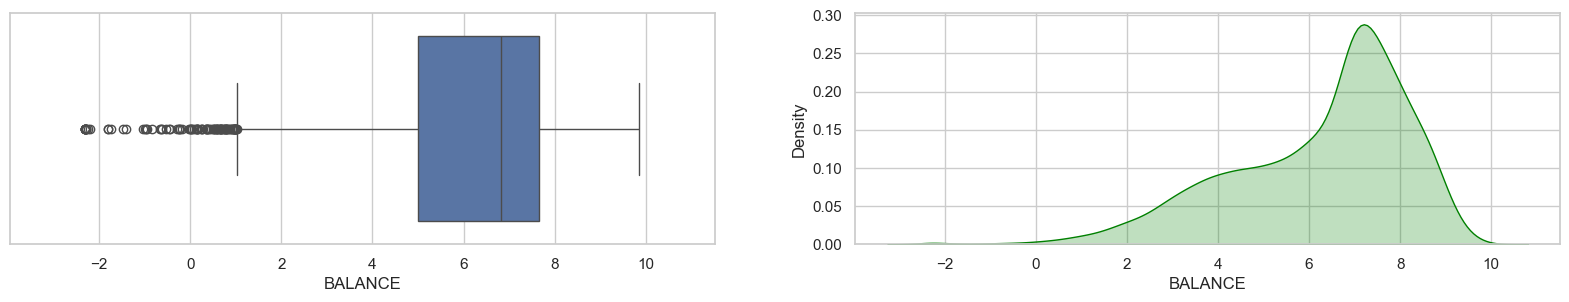

<Figure size 2000x300 with 0 Axes>

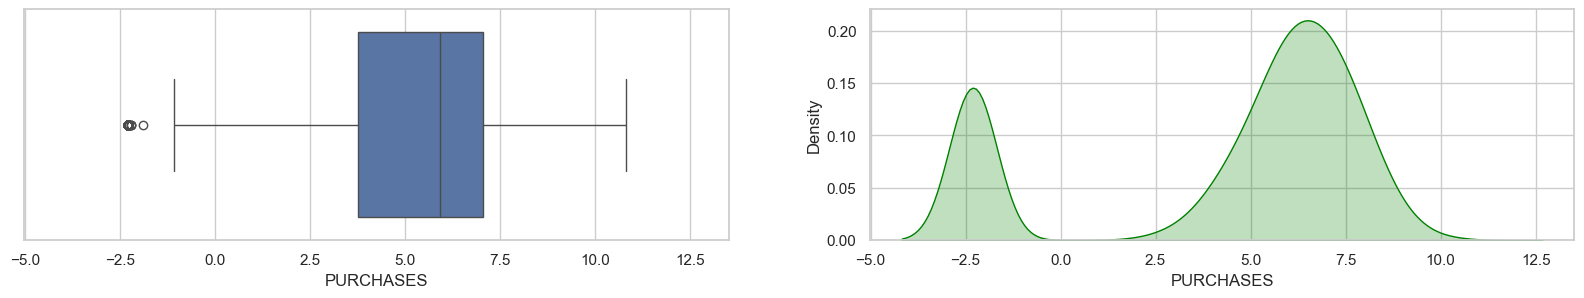

<Figure size 2000x300 with 0 Axes>

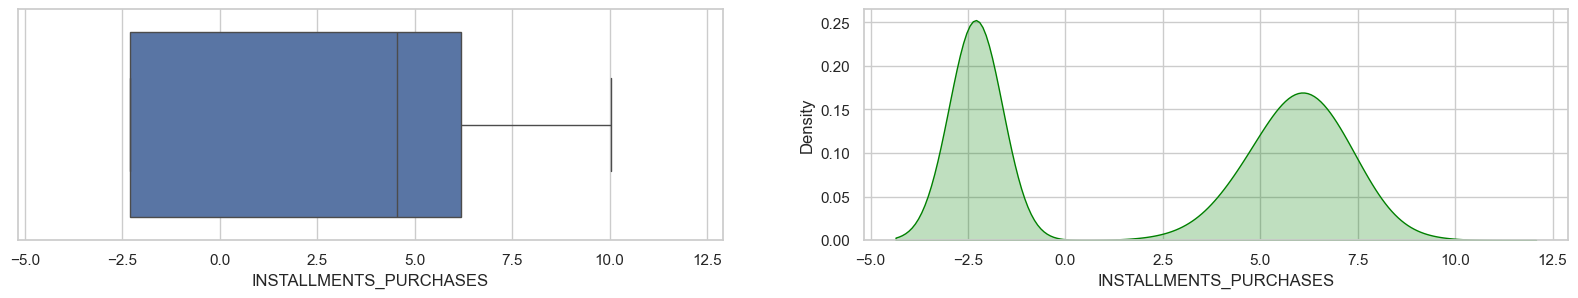

<Figure size 2000x300 with 0 Axes>

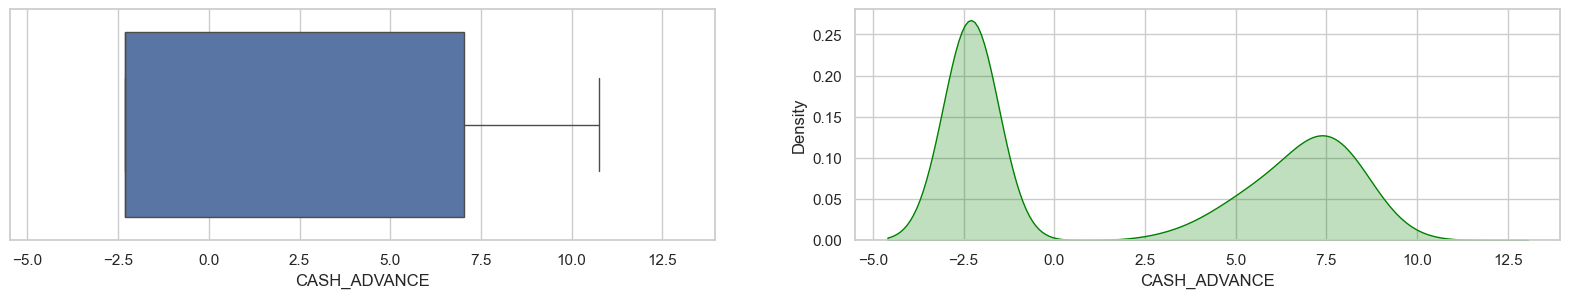

<Figure size 2000x300 with 0 Axes>

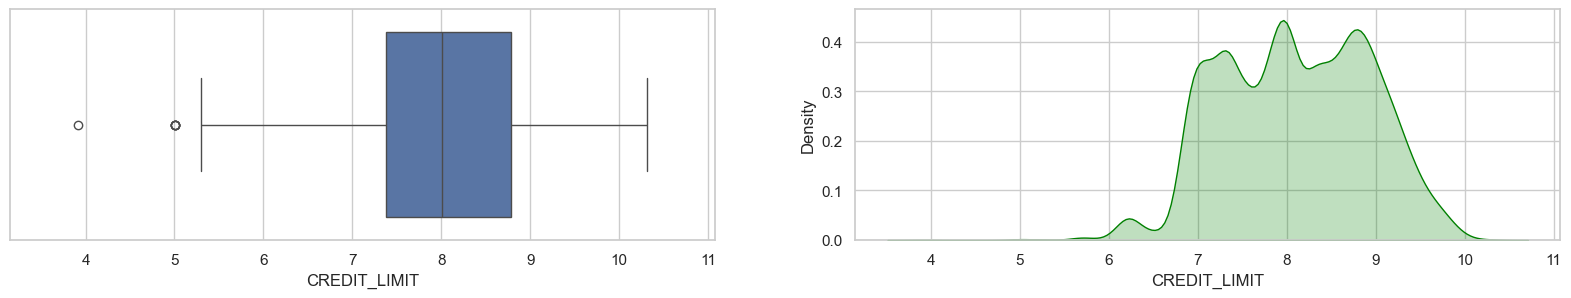

<Figure size 2000x300 with 0 Axes>

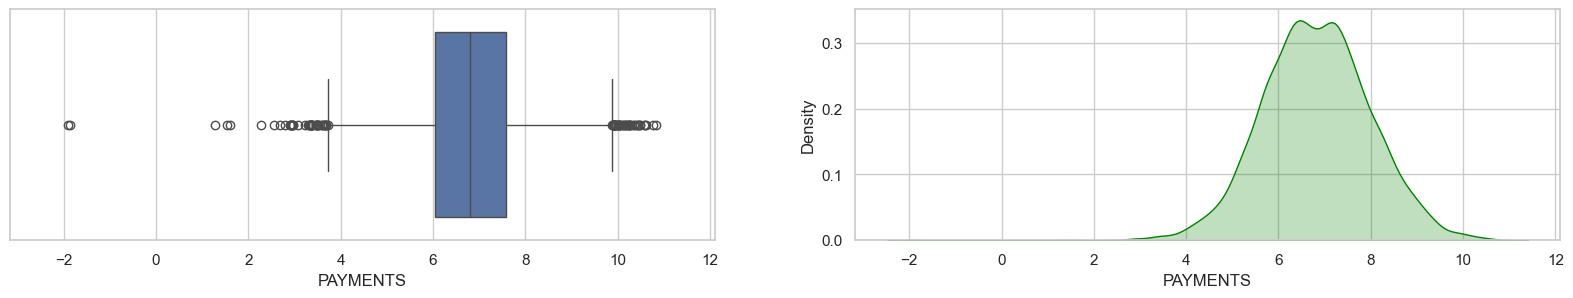

<Figure size 2000x300 with 0 Axes>

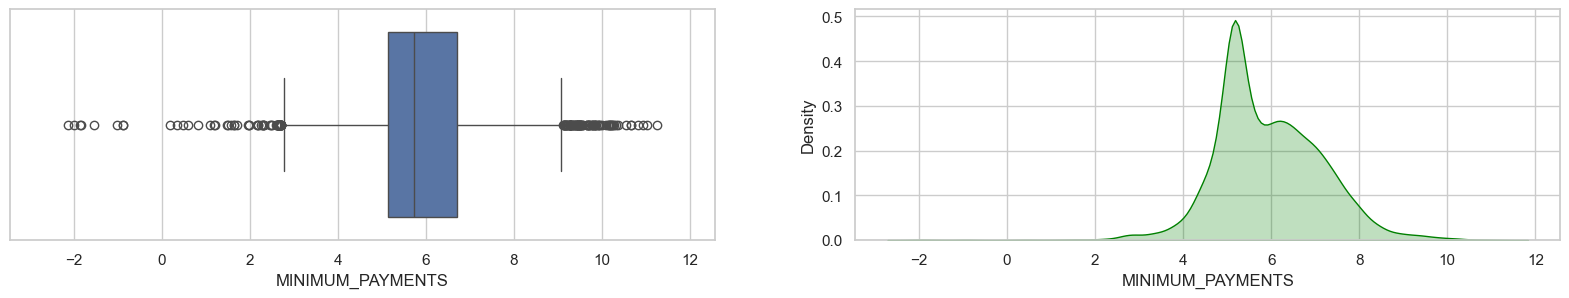

<Figure size 2000x300 with 0 Axes>

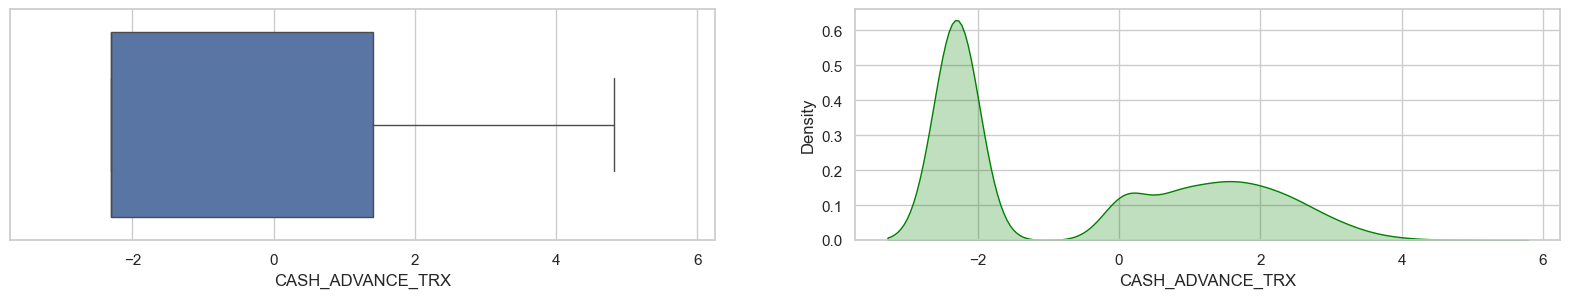

<Figure size 2000x300 with 0 Axes>

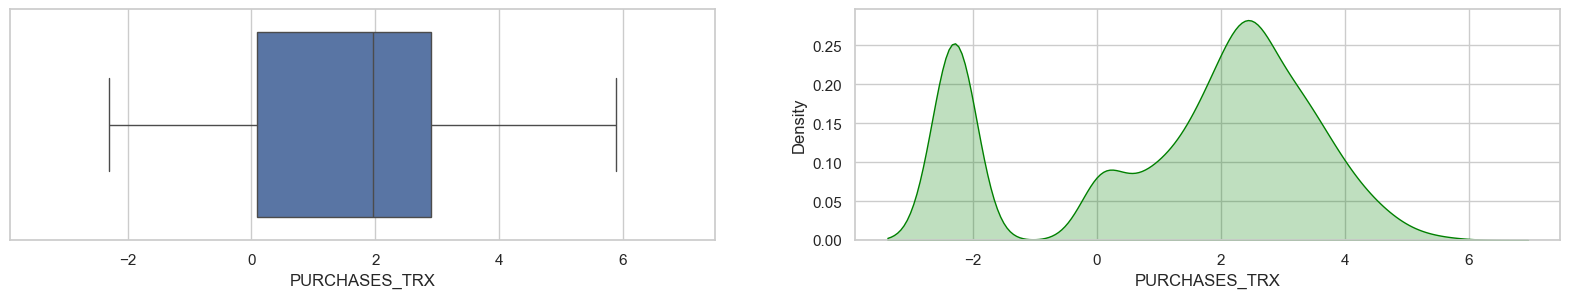

In [122]:
for col in list(df_copy[skewness_features].columns):
    if df_copy[col].nunique() > 7:
        plt.figure()
        rcParams['figure.figsize'] = (20, 3)
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
        plt.gca().set(xlabel=col, ylabel='Density')
        sns.boxplot(x=col, ax=ax_box, linewidth=1.0, data=df_copy, palette=None)  # Removed hue and palette='coolwarm'
        sns.kdeplot(df_copy[col], ax=ax_kde, fill=True, color='green')
        plt.show()


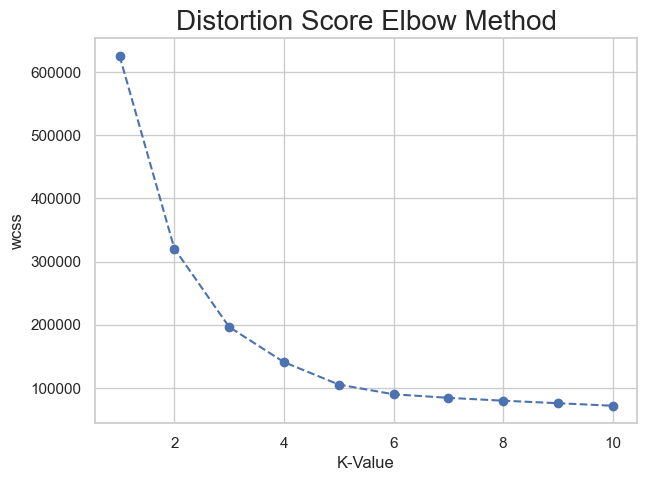

In [124]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()


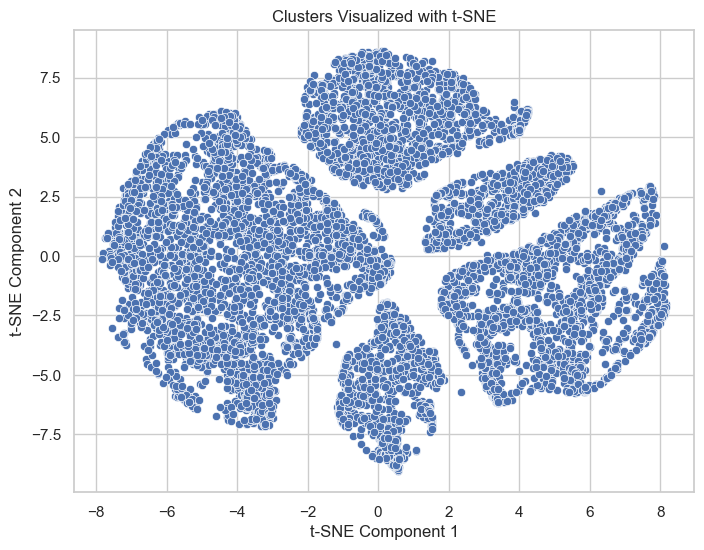

In [125]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [126]:
class K_means:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    def findClosestCentroids(self, X):
        m, _ = X.shape
        closest_centroids = np.zeros(m, dtype=int)

        for i in range(m):
            distances = np.linalg.norm(X.iloc[i].values - self.centroids, axis=1)
            closest_centroids[i] = np.argmin(distances)

        return closest_centroids

    def computeCentroids(self, X, idx):
        centroids = X.groupby(idx).mean().values

        return centroids

    def kMeansInitCentroids(self, X):
        idx = np.random.choice(X.index, self.K, replace=False)
        centroids = X.loc[idx].values

        return centroids

    def KMeans_alg(self, X, initial_centroids=None):
        if initial_centroids is None:
            self.centroids = self.kMeansInitCentroids(X)
        else:
            self.centroids = initial_centroids
        
        idx = self.findClosestCentroids(X)
        self.centroids = self.computeCentroids(X, idx)

        return self.centroids, idx

    def fit_predict(self, X):
        return self.findClosestCentroids(X)

In [127]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans_amgad = K_means(n_clusters)

# KMeans
centroids, idx = kmeans_amgad.KMeans_alg(df_copy)

# fit
predictions = kmeans_amgad.fit_predict(df_copy)

In [128]:
predictions


array([0, 3, 0, ..., 1, 3, 2])

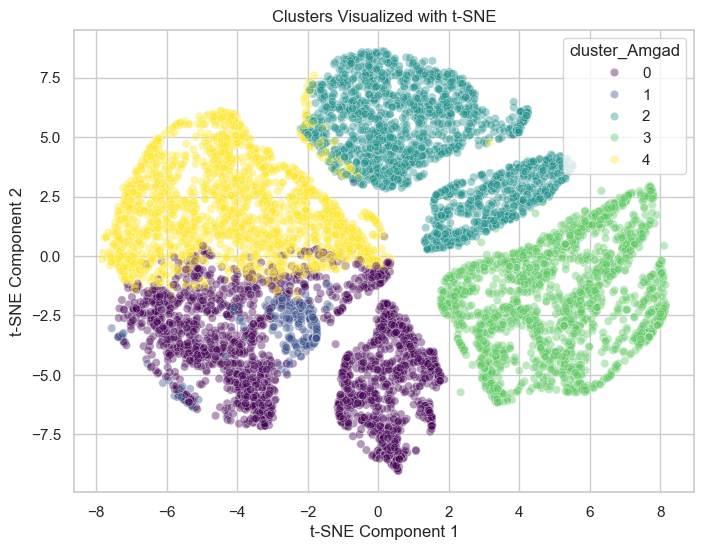

In [129]:
# Add the cluster information to the reduced data
df_tsne['cluster_Amgad'] = predictions

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster_Amgad', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [130]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df_copy)

KMeans(n_clusters=5)

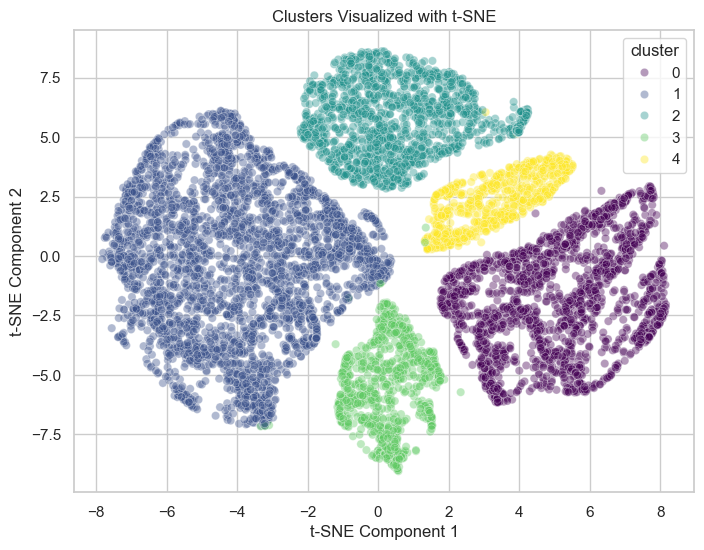

In [131]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

## Hierarchial Clustering

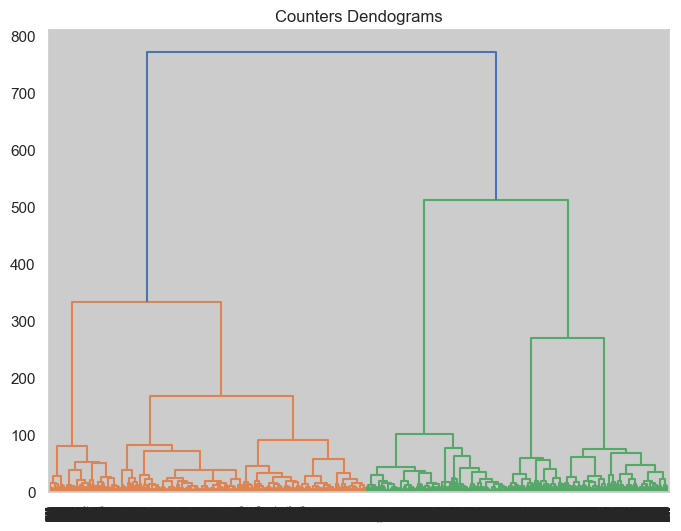

In [132]:
import scipy.cluster.hierarchy as shc
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

## AgglomerativeClustering


In [134]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)


AgglomerativeClustering(n_clusters=5)

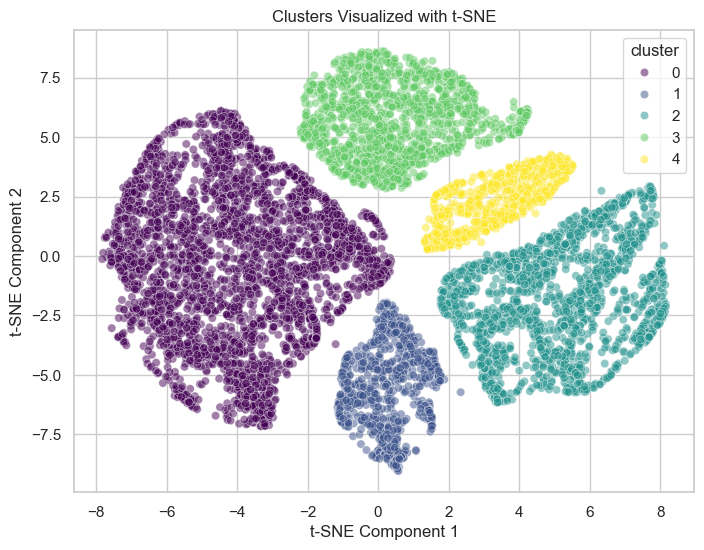

In [135]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = hier_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## GaussianMixture

In [136]:
#Number of clusters (K)
n_clusters = 5

# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gaussian_model.fit_predict(df_copy)


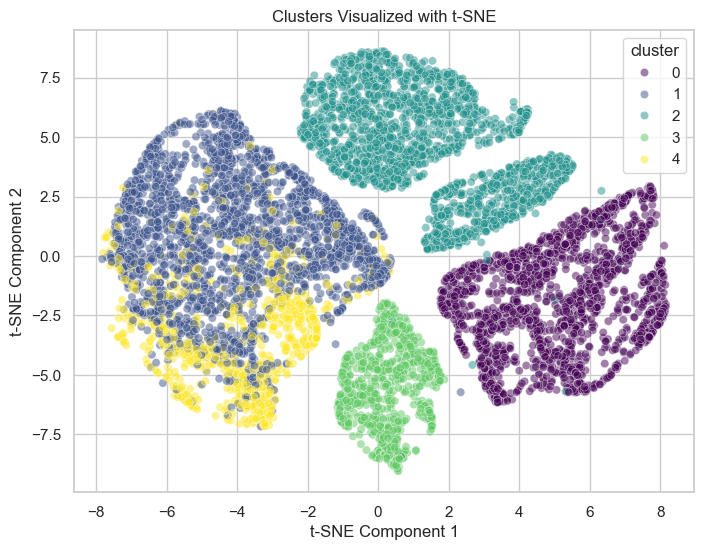

In [137]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis',alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()


## DBSCAN

In [138]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(df_copy)

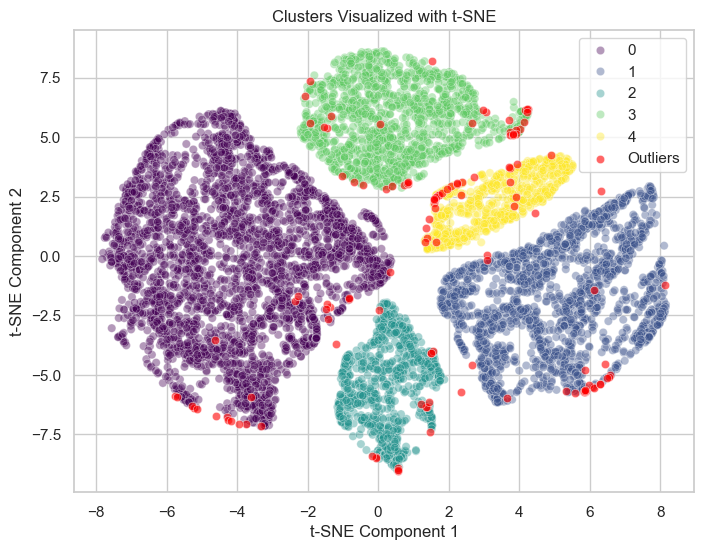

In [139]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = dbscan.labels_

outliers_mask = df_tsne['cluster'] == -1
df_tsne_without_outliers = df_tsne[~outliers_mask]

# Plot clusters with different colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers, palette='viridis', alpha=0.4)

# Color outliers (cluster = -1) with a specific color
outliers_mask = df_tsne['cluster'] == -1
sns.scatterplot(x=df_tsne.loc[outliers_mask, 't-SNE Component 1'], 
                y=df_tsne.loc[outliers_mask, 't-SNE Component 2'], 
                color='red', 
                label='Outliers', 
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

In [141]:
final_df = dataload.copy()
final_df.dropna(inplace=True)
final_df.drop(columns=['CUST_ID'],inplace=True)
final_df['Cluster'] = hier_model.labels_

In [142]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']

clusters = final_df['Cluster'].unique()

num_rows = len(cols)
num_cols = len(clusters)

In [143]:
def Cluster_analysis(cluster_num):
    fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4*num_rows))

    # Loop through each feature
    for i, col in enumerate(cols):
        # Select data points belonging to the first cluster
        data = final_df[final_df['Cluster'] == cluster_num][col]

        # Plot histogram for the first cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i], stat='percent', color='skyblue', label='Histogram')
        axes[i].set_title(f'Cluster 0 - {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Percent')

        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i].axvline(mean_value, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')

        # Create a boxplot on the same axes
        ax_box = axes[i].twinx()
        sns.boxplot(x=data, ax=ax_box, linewidth=1.0, color='salmon')

        axes[i].legend(loc='upper left')
        ax_box.legend(loc='lower right', labels=['Box Plot'])

    plt.tight_layout()
    plt.show()

#### First Cluster :


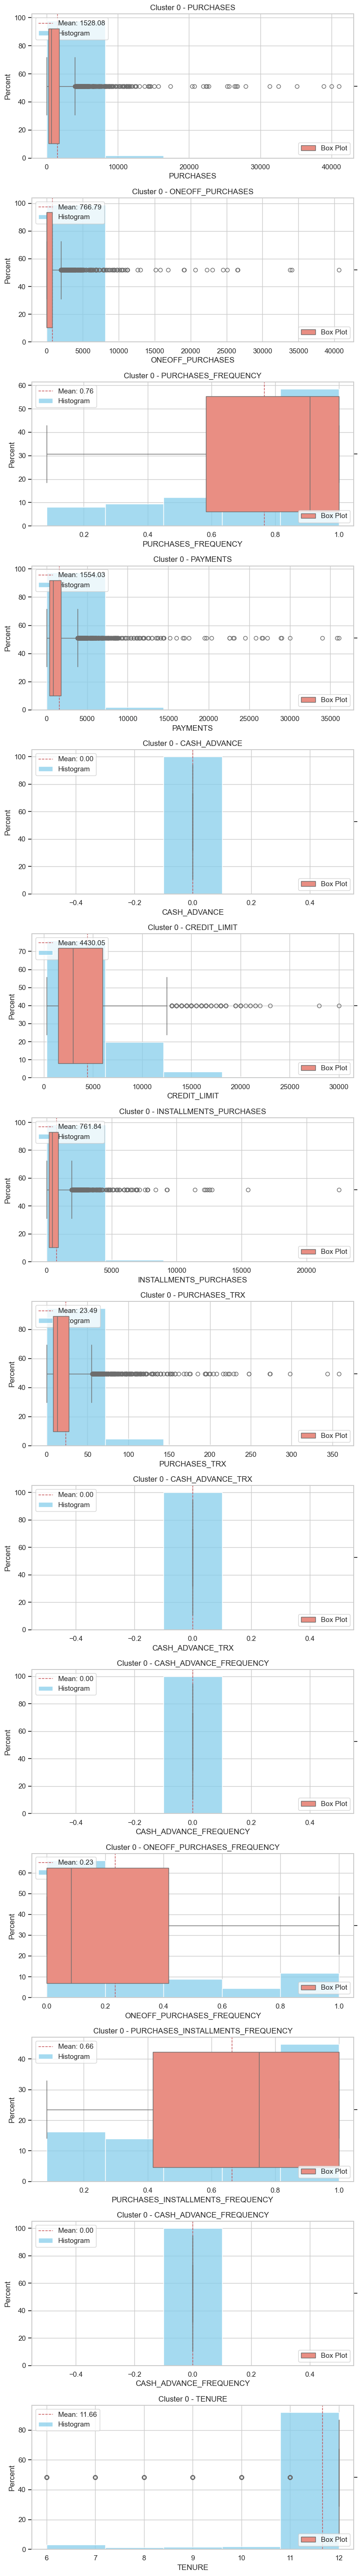

In [144]:
Cluster_analysis(0)


#### Second Cluster:

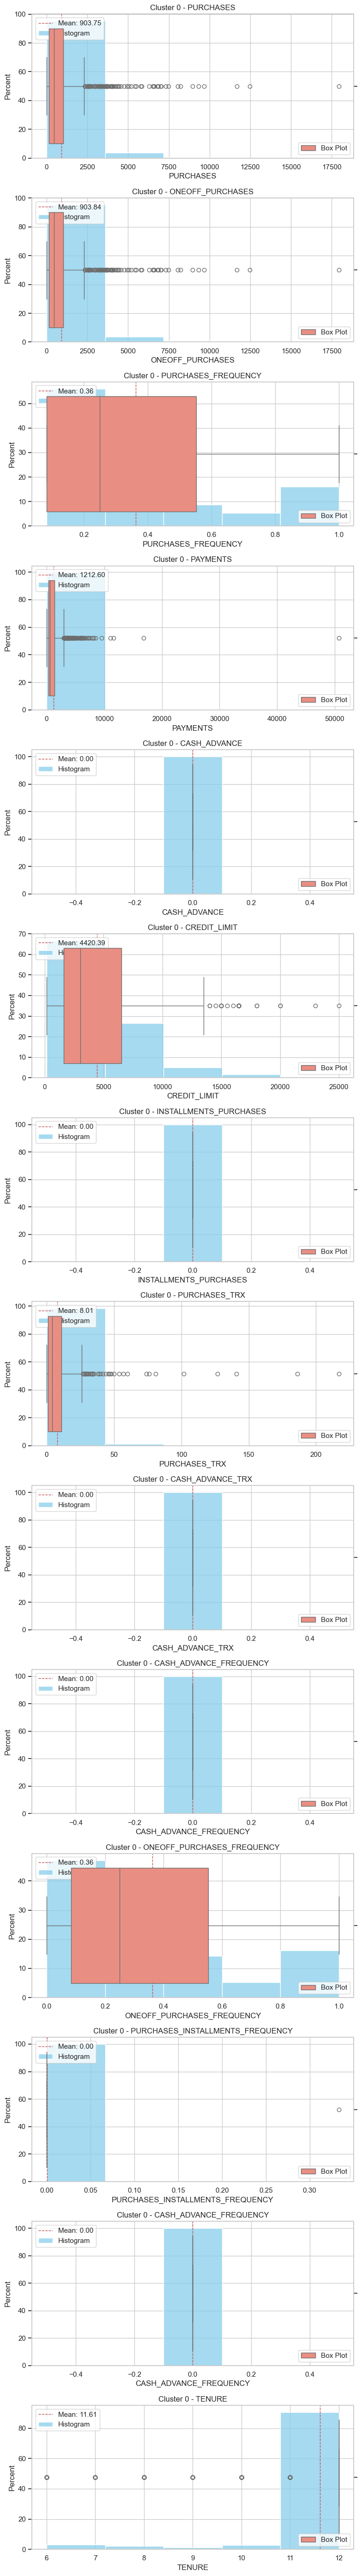

In [145]:
Cluster_analysis(1)

#### Third Cluster

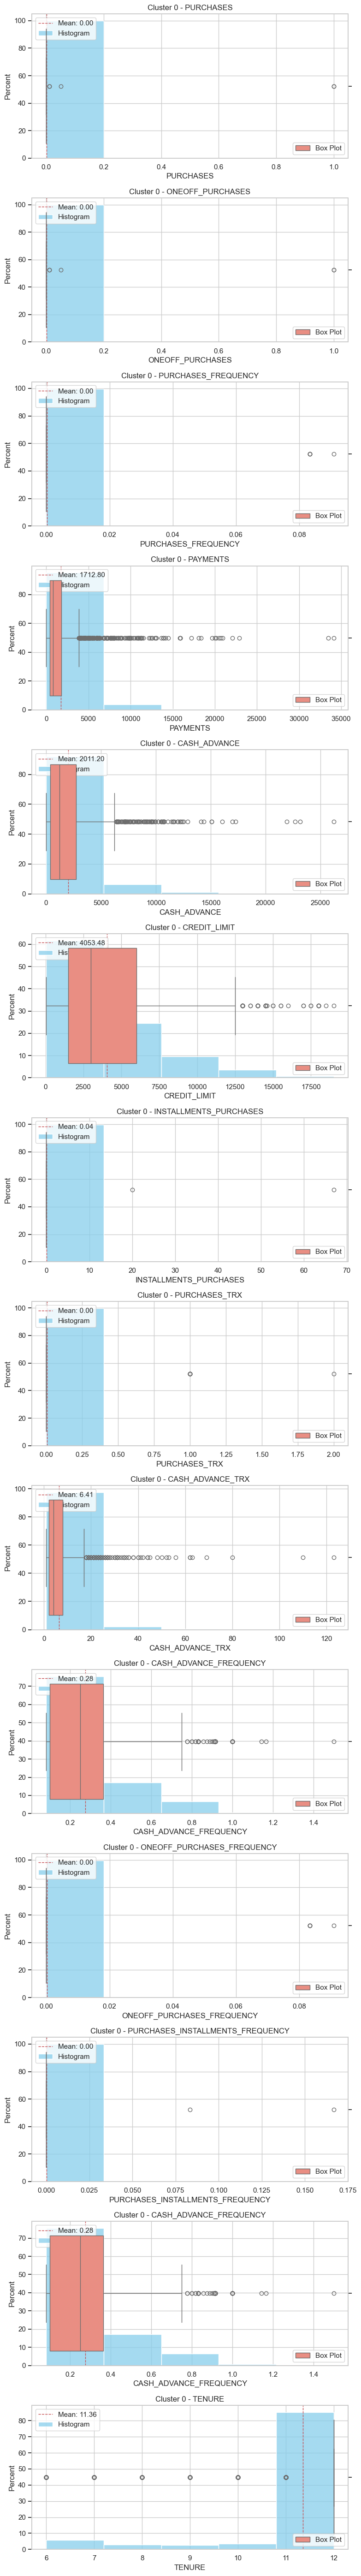

In [146]:
Cluster_analysis(2)

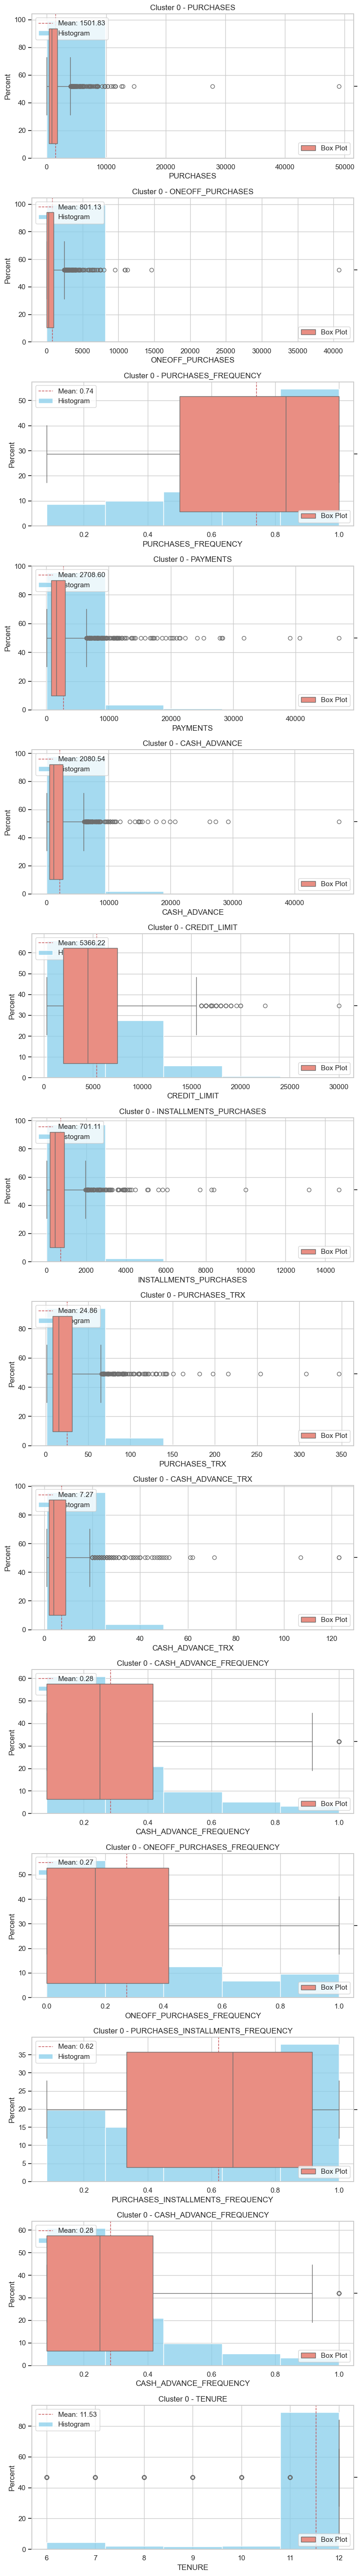

In [147]:
Cluster_analysis(3)

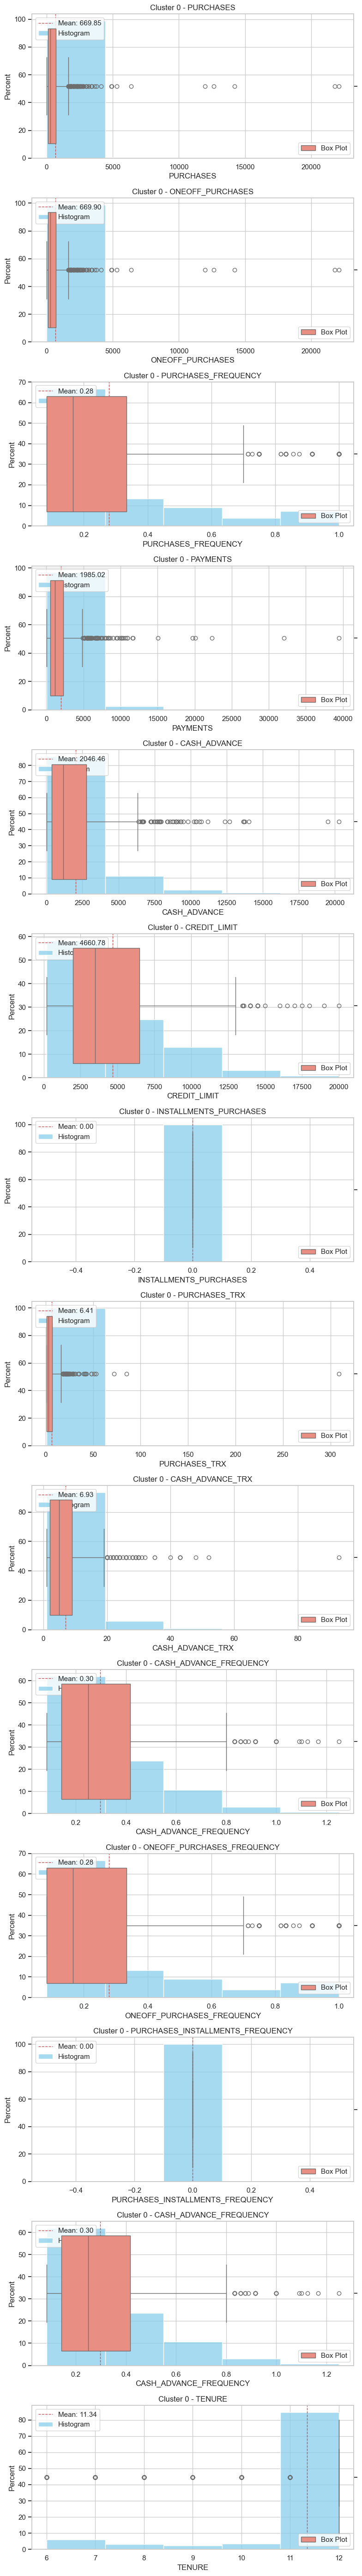

In [148]:
Cluster_analysis(4)

#### Applying PCA for improvement

In [149]:
pca = PCA(n_components=.95)
pca_result = pca.fit_transform(df_copy)

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)))

Explained variation summation for all components: 0.9662551582368194


In [150]:
pca_result.shape


(8636, 5)

In [151]:
def pick_random_color():
    return '#'+str(np.random.randint(100000, 999999))

#### Elbow Method After PCA- With K means label

In [152]:
wss = []
K = range(2,21)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_result)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

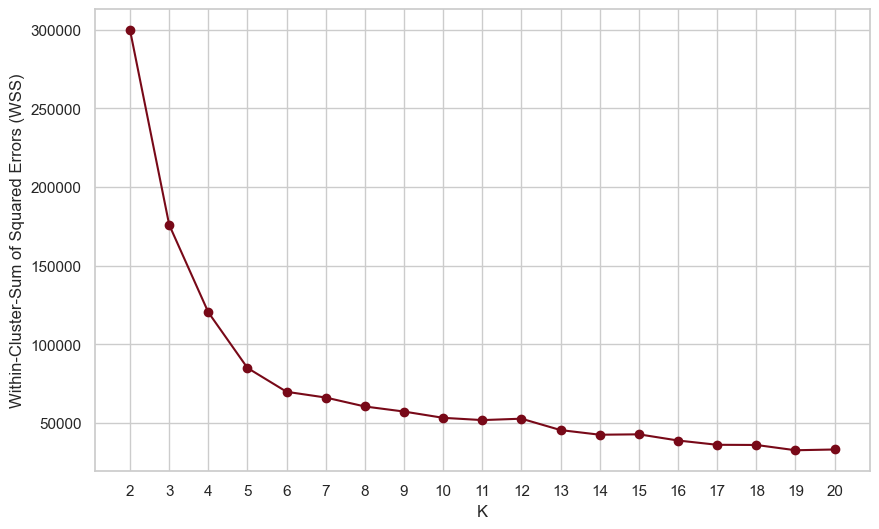

In [153]:
plt.figure(figsize=(10,6))
plt.plot(K,wss, marker = 'o', c = pick_random_color())
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(K);

In [154]:
kmeans = KMeans(n_clusters=6 ,init="k-means++")
kmeans = kmeans.fit(pca_result)

Clusters = kmeans.labels_
Clusters

array([0, 1, 3, ..., 0, 1, 5])

In [155]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(pca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.178s...
[t-SNE] Computed neighbors for 8636 samples in 2.869s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.406604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.747261
[t-SNE] KL divergence after 2000 iterations: 0.871262


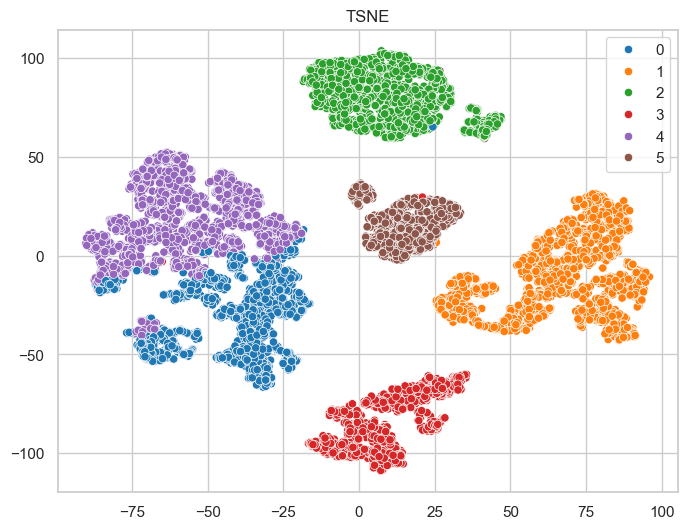

In [158]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");


#### With Hierarchial Clustering labels after PCA was the best as without PCA

In [159]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(pca_result)

AgglomerativeClustering(n_clusters=5)

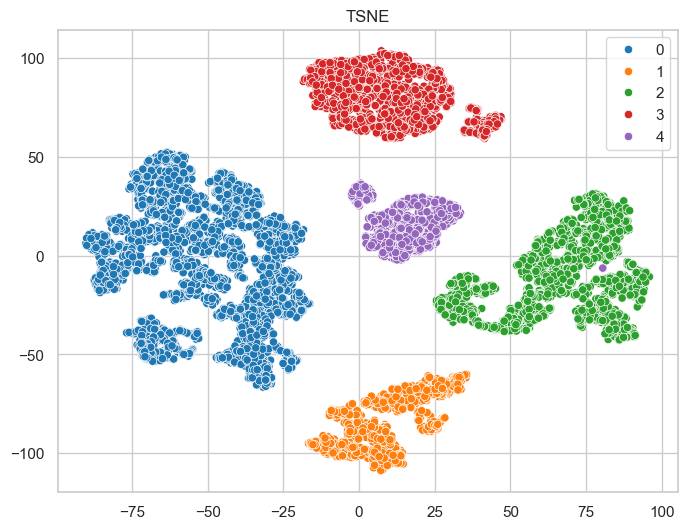

In [160]:
# Add the cluster information to the reduced data
cluster = hier_model.labels_

sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=cluster,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

#### With PCA is almost same as without PCA

In [161]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel='poly', n_components=6)
kpca_result = kpca.fit_transform(df_copy)

In [162]:
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(kpca_result)

Clusters = kmeans.labels_
Clusters

array([0, 3, 4, ..., 0, 4, 4])

In [163]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(kpca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.107s...
[t-SNE] Computed neighbors for 8636 samples in 1.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 6.437032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.515236
[t-SNE] KL divergence after 2000 iterations: 0.846774


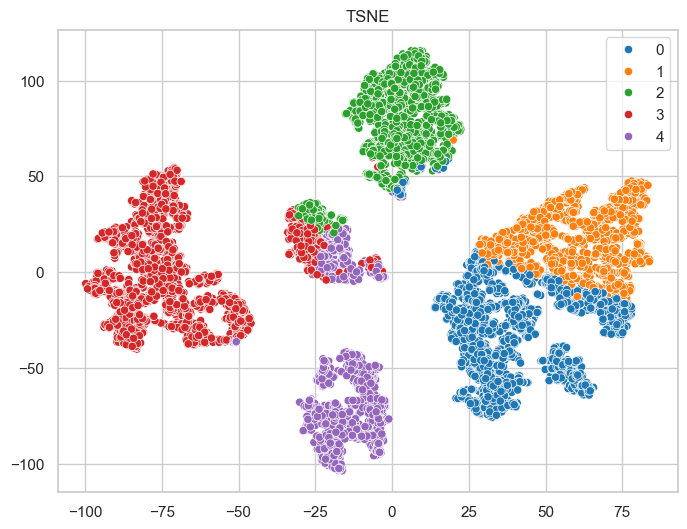

In [165]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

###  Gap Analysis 

In [164]:
!pip install gap-stat


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6137 sha256=5bfcf31b703817bda45ace3658647d20180dfc98163f1b966a1aa5f26f7660f6
  Stored in directory: c:\users\sendi\appdata\local\pip\cache\wheels\0d\2f\a2\116d2693de61c2dbaedc21b226eaa5050accc61fbc5f23a703
Successfully built gap-stat



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_copy, cluster_array=np.arange(1, 11))

print(f'Optimal number of clusters: {n_clusters}')

Optimal number of clusters: 10


Optimal number of clusters: 10


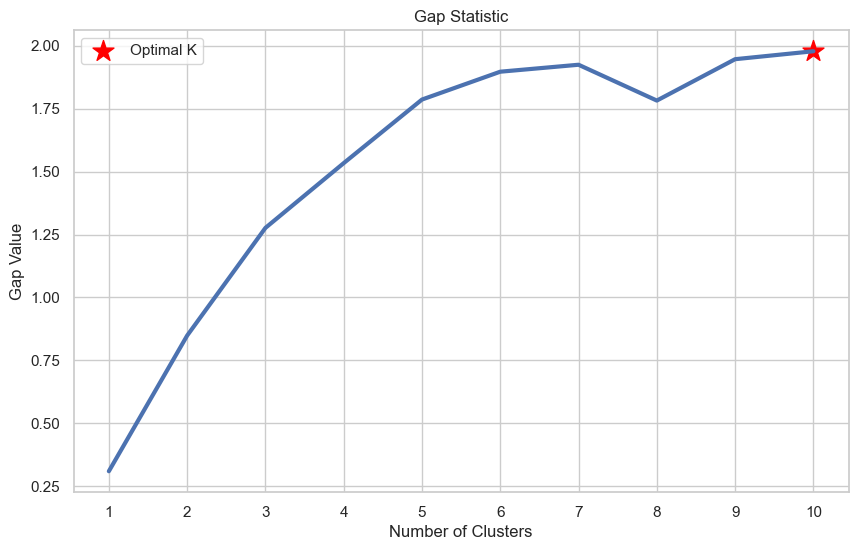

In [167]:
print(f'Optimal number of clusters: {n_clusters}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), optimalK.gap_df.gap_value, linewidth=3, color='b')
plt.scatter(n_clusters, optimalK.gap_df.loc[n_clusters-1, 'gap_value'], s=250, c='red', marker='*', label='Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.title('Gap Statistic')
plt.xticks(np.arange(1, 11))
plt.legend()
plt.grid(True)
plt.show()

#### Cluster Analysis using KMeans Algorithm and t-SNE Visualization

In [168]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_copy)
labels = kmeans.labels_
df_copy['label'] = labels

In [169]:
# Number of clusters (K)
n_clusters = 10

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)

AgglomerativeClustering(n_clusters=10)

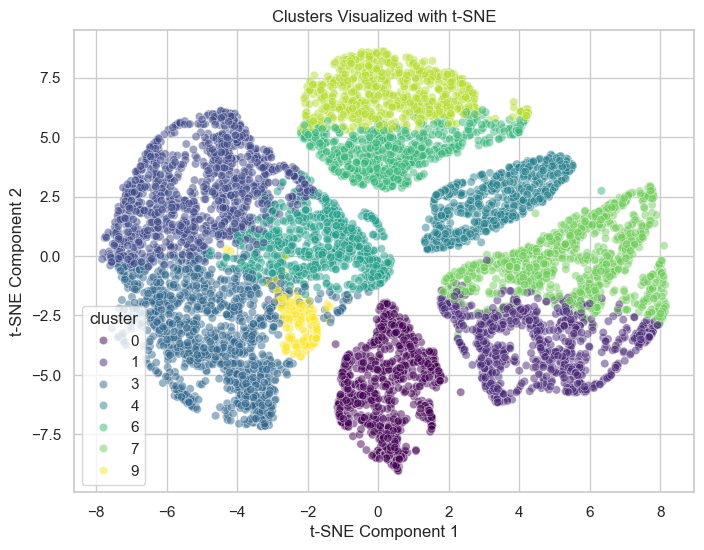

In [170]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = hier_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

##### The gap Analysis gives 10 best clusters